# End-to-end ML project walkthrough: Titanic

The goal of this notebook is to build an end-to-end Machine Learning project and outline core steps in building and training machine learning model.

## Machine Learning Project Checklist
> This list is based on a list available in ['Hands-On Machine Learning with scikit-learn, TensorFlow and Keras'](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurelien Geron.
1. Frame the problem and look at the big picture 
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and find the best ones.
6. Fine-tune your models and combine them (ensamble models) into a great solution.
7. Present your solution
8. Launch, monitor and maintain your system

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Step 1: Frame the Problem and look at big picture
1. Define the objective in business terms.
    - the goal to use a set of features provided to solve a binary classification problem and attempt to predict which of the Titanic's passengers are most likely to survive
2. How will your solution be used?
    - To perform a one-off prediction of surivors on the Titanic ship
3. What are the current solutions/workarounds (if any)?
    - N/A - there are other people's notebooks online, but we're trying to learn ourselves
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
    - Supervised - dataset provides labeled inputs and outputs
    - Classification problem - predicted value is categorical (survived - 1/not survived - 0) - *Binary Classification*
    - batch learning - the entire model will be trained at once, there won't be any extra data fed to the model afterwards
5. How should performance be measured?
    - using conventional approach for such problem when testing the model - RMSE/MAE 
    - the submission will be evaluated using *accuracy* - percentage of correct predictions
    - ![accuracy](https://wikimedia.org/api/rest_v1/media/math/render/svg/7bfe40cea126a04004b82f729cf7df1ec435fbf6)
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objective?
    - N/A - the higher the better, although a personal goal would be to reach >80% accuracy on the final submission
8. What are comparable problems? Can you reuse experience or tools?
    - other people's notebooks (**don't be afraid to look for ideas there**)
    - [Spaceship Titanic Competition](https://www.kaggle.com/competitions/spaceship-titanic)
    - any notebooks/code snippets you have previously written
9. Is human expertise available?
    - There are other notebooks available on Kaggle, as well as detailed Youtube guides for this project. 
10. How would you solve the problem manually?
    - manually identify features most correlated with passenger surviving, 
        - try to plot them on a scatter plot, manually fit linear regression line
        - based on correlation of each feature manually calculate the probability of each passenger surviving and test it with labeled data to see if assumptions were correct
        - try to engineer more suitable features and repeat previous steps
11. List the assumptions you (or others) have made so far.
    1. women are more likely to survive than men
    2. higher class passengers are more likely to survive
    3. <del>due to location on the ship passenger's cabin may have an impact on their survival rate, but not to the same extent as previous 2 assumption. </del>
    4. Port of Embarkation has no impact on survival
    5. younger passenger (especially kids) are more likely to survive
    6. family members have a higher survival rate
12. Verify assumptions if possible (done after step 3).


## Step 2: Get the data
**NOTE:** Automate as much as possible so you can easily get fresh data
1. [X] List the data you need and how much you need.
    - test set
    - training set
    - (optional) example submission
2. [X] Find and document where you can get that data.
    - Titanic Competition on Kaggle
3. [X] Check how much space it will take.
    - <100kB
4. [X] Check legal obligations, and get authorization if necessary.
    - N/A
5. [X] Get access authorizations.
    - N/A
6. [X] Create a workspace (with enough storage space).
7. [X] Get the data.
8. [X] Convert the data to a format you can easily manipulate (without changing the data itself).
    - Data is already in such format
9. [X] Ensure sensitive information is deleted or protected (e.g., anonymized)
    - N/A
10. [X] Check the size and type of data (time series, sample, geographical, etc.).
11. [X] Sample a test set, put it aside, and never look at it (no data snooping!)
    - This is already done in test.csv, optionally you can split the train set.


In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 3: Explore the data to gain insights
**NOTE:** try to get insights from a field exper for these steps
1.	Create a copy of the data for exploration (sampling it down to a managable size if necessary).
2.	Create a Jupyter notebook to keep a record of your data exploration.
3.	Study each attribute and its characteristics: 
    - name
    - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
    - % of missing values
    - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
    - Usefulness for the task
    - Type of distribution (Gaussian, uniform, logarithmic (log_transform), etc.)
4.	For supervised learning tasks, identify the target attribute(s).
5.	Visualize the data.
6.	Study the correlations between attributes.
7.	Study how you would solve the problem manually
8.	Identify the promising transformations you may want to apply.
9.	Identify extra data that would be useful (go back to ‘Get the data’ step).
10.	***Document what you have learned***.


In [4]:
#create a copy of the dataset to explore
df_copy = df.drop('Cabin', axis=1).copy()

In [5]:
#check underlying data types
df_copy.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [6]:
#check for NaNs in the dataset
df_copy[df_copy.isnull().any(1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


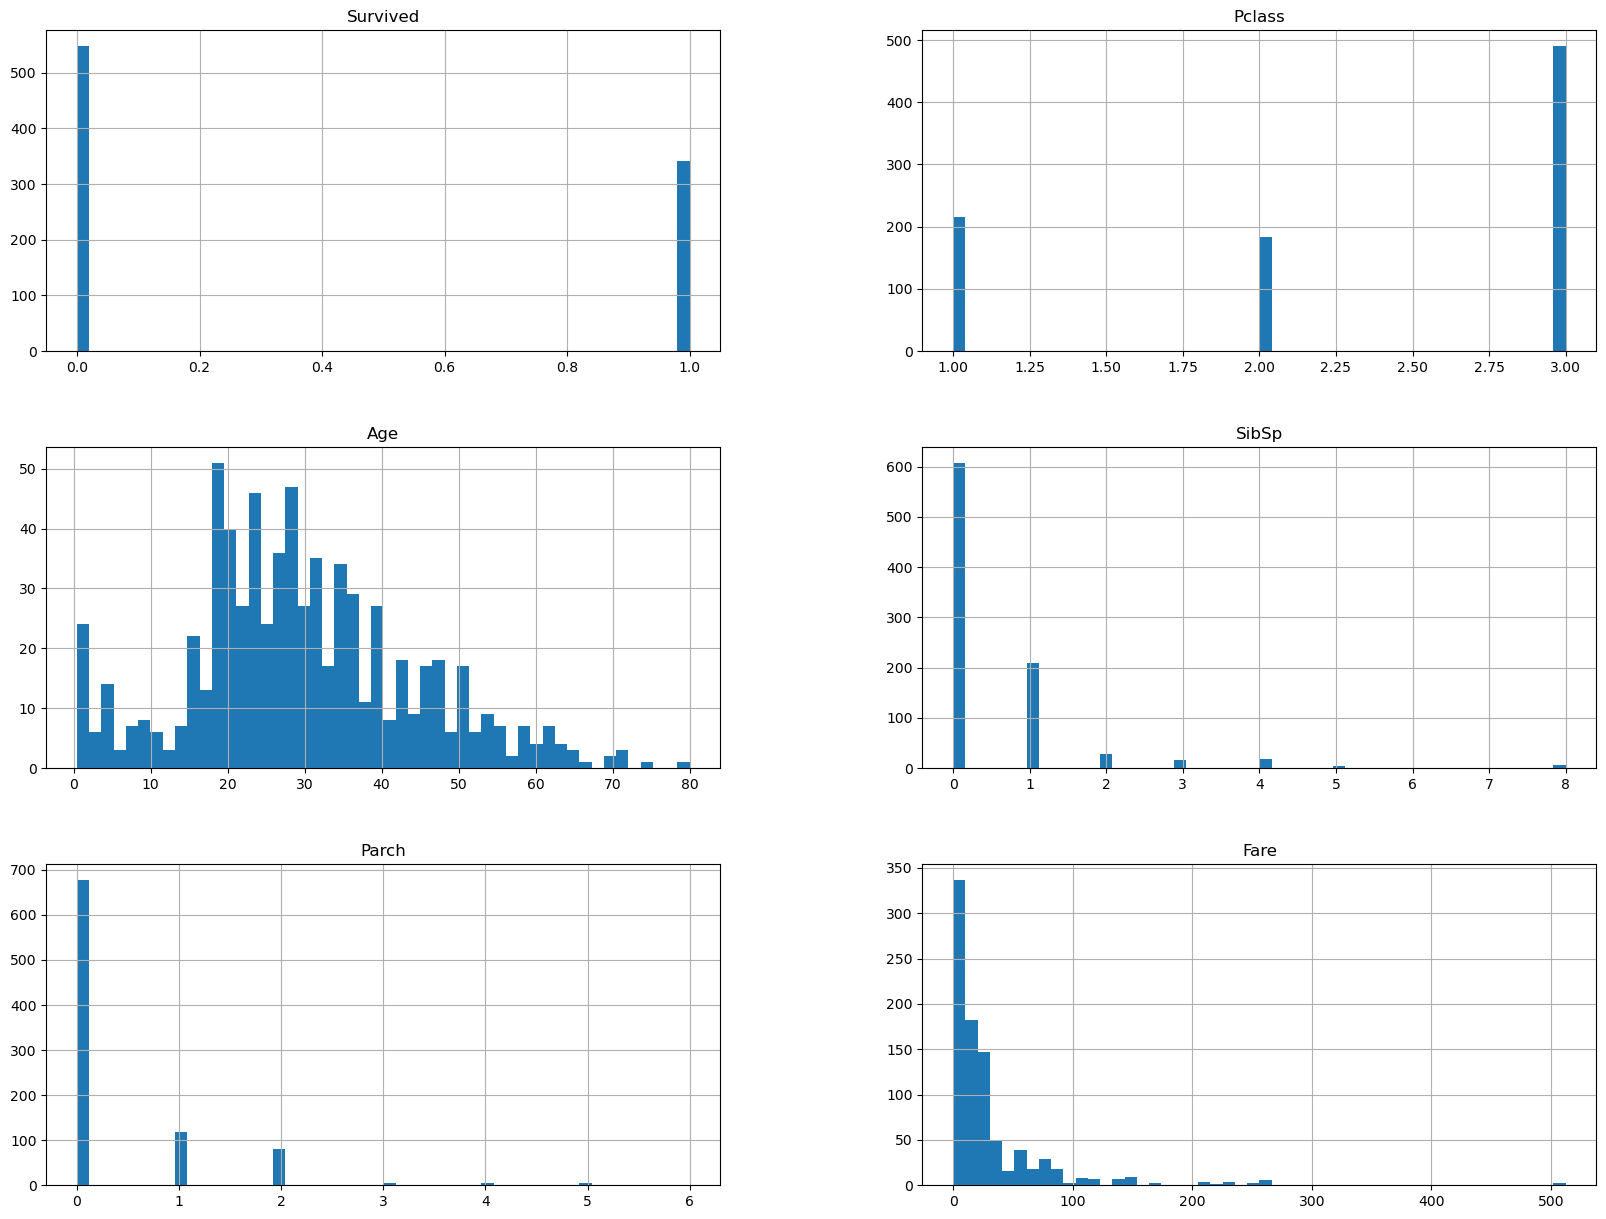

In [7]:
#plot a histogram to check feature distribution
%matplotlib inline
df_copy[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

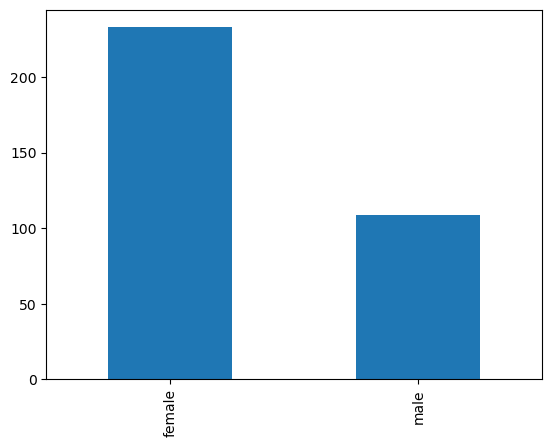

In [8]:
#verify the assumption A: 'women are more likely to surive than men'
df_copy[df_copy['Survived']==1].Sex.value_counts().plot(kind='bar')

<AxesSubplot:>

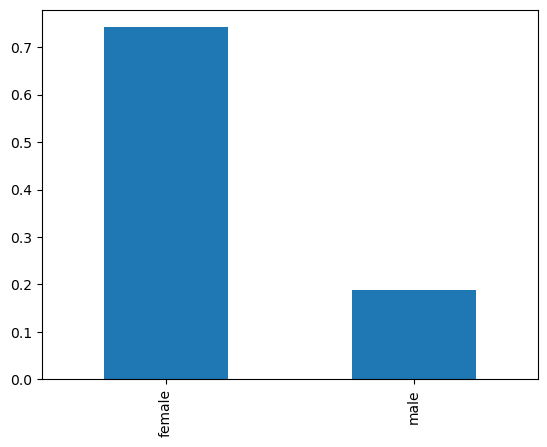

In [9]:
#as a proportion of total almost 80% of women survived as opposed to just 20% of men
(df_copy[df_copy['Survived']==1]['Sex'].value_counts() / df_copy['Sex'].value_counts()).plot(kind='bar')

(array([[136.,   0.,   0.,   0.,   0.,  87.,   0.,   0.,   0., 119.],
        [ 80.,   0.,   0.,   0.,   0.,  97.,   0.,   0.,   0., 372.]]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 2 BarContainer objects>)

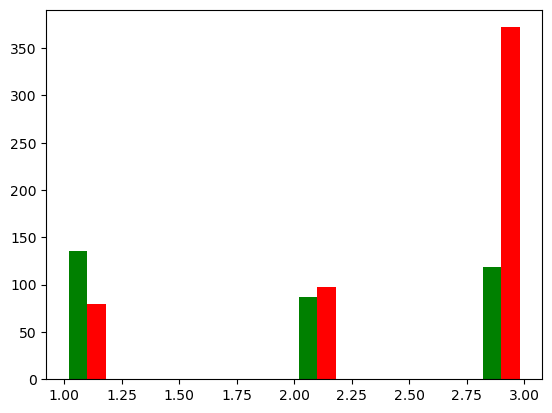

In [10]:
#verify assumption B: 'higher class passengers are more likely to survive'
plt.hist([df_copy[df_copy['Survived']==1]['Pclass'], df_copy[df_copy['Survived']==0]['Pclass']], color=['g','r'])

(array([[ 93.,   0.,   0.,   0.,   0., 217.,   0.,   0.,   0.,  30.],
        [ 75.,   0.,   0.,   0.,   0., 427.,   0.,   0.,   0.,  47.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

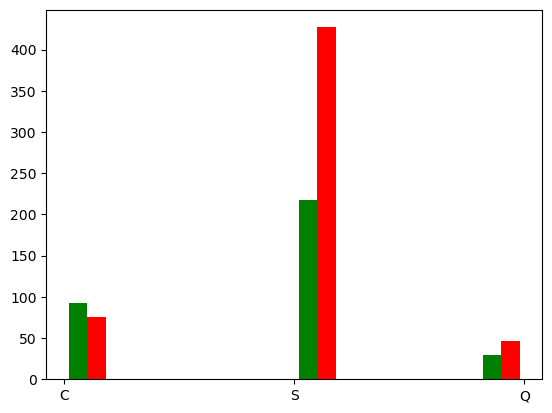

In [11]:
#plotting survival rate for assumption D: 'Port of Embarkation has no impact on survival rate'
df_copy['Embarked'] = df_copy['Embarked'].astype('string')
df_copy.dtypes
df_copy[pd.isna(df_copy['Embarked'])]
df_copy.dropna(subset=['Embarked'], inplace=True)
#df_copy.head()
plt.hist([df_copy[df_copy['Survived']==1]['Embarked'], df_copy[df_copy['Survived']==0]['Embarked']], color=['g','r'])

In [12]:
#an average price of ticket passengers paid at each port seems to explain assumption D
df_copy.groupby('Embarked').mean()['Fare']

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

(array([[ 36.,  19.,  63.,  65.,  51.,  24.,  21.,   8.,   0.,   1.],
        [ 18.,  27., 114., 104.,  66.,  46.,  24.,  15.,   9.,   1.]]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 2 BarContainer objects>)

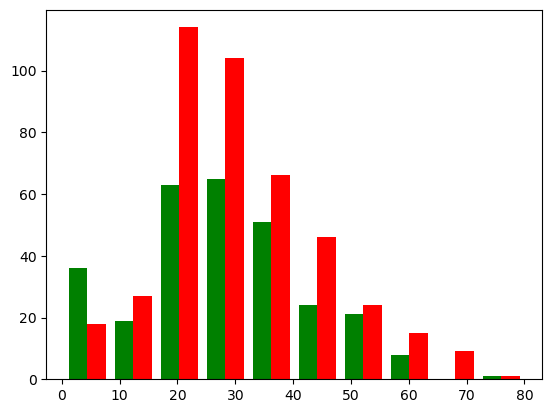

In [13]:
#plot passengers by age to verify assumption E
plt.hist([df_copy[df_copy['Survived']==1]['Age'], df_copy[df_copy['Survived']==0]['Age']], color=['g','r'])

(array([[231.,  65.,   0.,  40.,   0.,   3.,   0.,   0.,   1.,   0.],
        [445.,  53.,   0.,  40.,   0.,   2.,   4.,   0.,   4.,   1.]]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 2 BarContainer objects>)

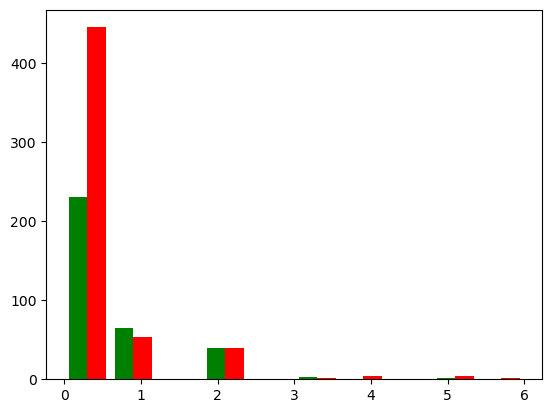

In [14]:
#assumption E: 'family members have a higher survival rate'
plt.hist([df_copy[df_copy['Survived']==1]['Parch'], df_copy[df_copy['Survived']==0]['Parch']], color=['g','r'])

(array([[208., 112.,  13.,   4.,   0.,   3.,   0.,   0.,   0.,   0.],
        [398.,  97.,  15.,  12.,   0.,  15.,   5.,   0.,   0.,   7.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 2 BarContainer objects>)

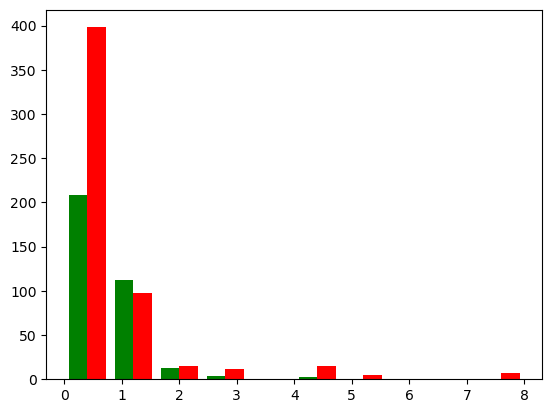

In [15]:
#this assumption seems to be correct however, passengers with family are an unrepresentative sample
plt.hist([df_copy[df_copy['Survived']==1]['SibSp'], df_copy[df_copy['Survived']==0]['SibSp']], color=['g','r'])

In [16]:
#plot a correlation matrix to investigate correlations between items
correlation_matrix = df_copy[['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000


array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<A

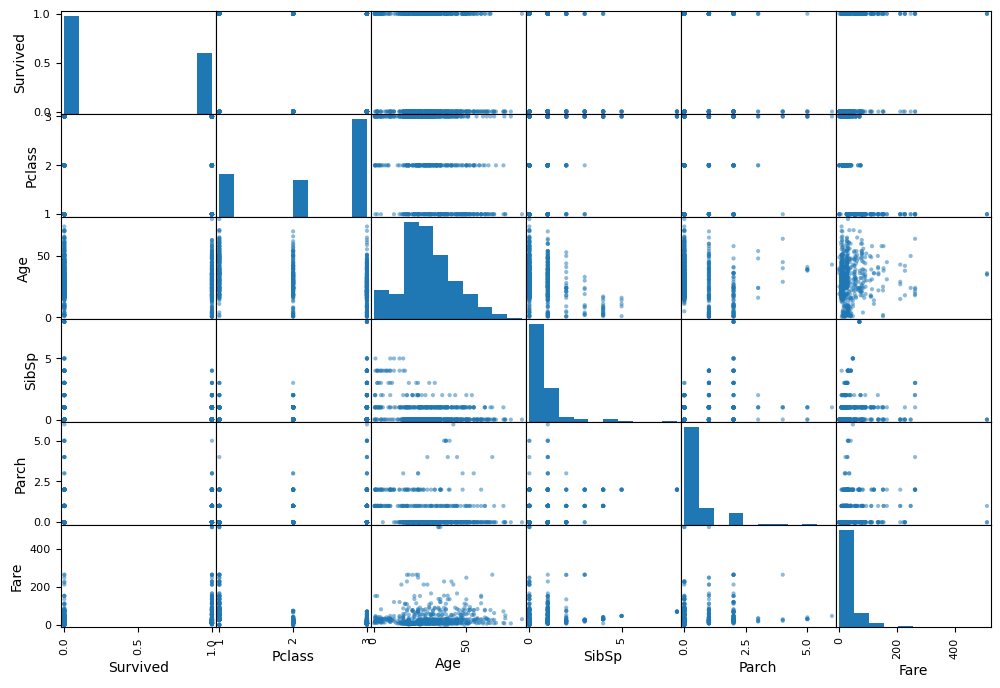

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
scatter_matrix(df_copy[attributes], figsize=(12, 8))

In [18]:
"""titles = r"([Miss|Mr|Master|Sir|Mrs]+.)"
df_copy['title']=df_copy['Name'].str.extract(r', (\w+\.)')
df_copy['title'] = df_copy['title'].astype('string')
df_copy['title'].dtype
df_copy[pd.isna(df_copy['title'])]
#df_copy.drop(12, axis=1, inplace=True)
#df_copy.loc[759, 'title'] = 'Countess'
#[df_copy['PassengerId']==760]['title'] = 'Countess'
plt.figure(figsize=(16,7))
plt.hist([df_copy[df_copy['Survived']==1]['title'], df_copy[df_copy['Survived']==0]['title']], color=['g','r'])"""

'titles = r"([Miss|Mr|Master|Sir|Mrs]+.)"\ndf_copy[\'title\']=df_copy[\'Name\'].str.extract(r\', (\\w+\\.)\')\ndf_copy[\'title\'] = df_copy[\'title\'].astype(\'string\')\ndf_copy[\'title\'].dtype\ndf_copy[pd.isna(df_copy[\'title\'])]\n#df_copy.drop(12, axis=1, inplace=True)\n#df_copy.loc[759, \'title\'] = \'Countess\'\n#[df_copy[\'PassengerId\']==760][\'title\'] = \'Countess\'\nplt.figure(figsize=(16,7))\nplt.hist([df_copy[df_copy[\'Survived\']==1][\'title\'], df_copy[df_copy[\'Survived\']==0][\'title\']], color=[\'g\',\'r\'])'

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
nums = df[['Pclass', 'Age', 'Parch', 'Fare']]
imputer.fit(nums)
#stored the calculated value
imputer.statistics_
#replace missing data in the dataset - creates plain numpy array
X = imputer.transform(nums)
#recreate the pandas datafram from numpy array
nums_tr = pd.DataFrame(X, columns=nums.columns,
index=nums.index)

In [20]:
from sklearn.preprocessing import OrdinalEncoder
df_gender = df_copy[['Sex']]
ordinal_encoder = OrdinalEncoder()
df_gender = ordinal_encoder.fit_transform(df_gender)
df_gender[:10]
#preview names of numerical categories
ordinal_encoder.categories_
#set column values to numerical
df_copy['Sex'] = df_gender

## Step 4: Prepare the data to better expose the underlying data patterns to Machine Learning algorithms 
**NOTES** 
1.	work on copies of the data (keep the original dataset intact)
2.	write functions for all data transformations you apply, for five reasons 
    1.	so you can easily prepare the data enxt time you get a fresh dataset
    2.	so you can apply these transformations in future projects
    3.	to clean and prepare the test set
    4.	to clean and prepare new data isntances once your solution is live
    5.	to make it easy to treat your preparation choices as hyperparameters
---
1.	Data cleaning 
    1.	fix or remove outliers (optional)
2.	fill in missing values (e.g. with zero, mean, median…) or drop their rows (or columns).
    2.	Feature selection (optional): 
    1.	Drop the attributes that proved no useful information for the task.
3.	Feature engineering, where appropirate: 
    1.	Discretize continuous features
    2.	decompose features (e.g. categorical ,date/time, etc.).
    3.	Add promising transformations of features (e.g. log(x), sqrt(x) etc.)
    4.	aggregate features into promising new features
4.	Feature scaling 
    1.	standardize or normalize features


In [21]:
def prepare_dataframe(dataset):
    df_clean = dataset.dropna(subset=['Embarked'])
    df_prepared_features = df_clean[['Pclass', 'Age', 'Parch', 'Fare', 'Embarked', 'Sex']].copy()
    try:
        df_prepared_target = df_clean[['Survived']].copy()
    except KeyError:
        return df_prepared_features
    df_prepared_categorical = df_prepared_features[['Embarked', 'Sex']]
    return df_prepared_features, df_prepared_target

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

def run_pipeline(dataset):
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ])
    num_attribs = list(dataset.drop(['Embarked', 'Sex'], axis=1))
    cat_attribs = ['Embarked', 'Sex']
    full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ])
    return full_pipeline.fit_transform(dataset)


In [23]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
#prepare train dataframe
df_prepared_features, df_prepared_target = prepare_dataframe(df)

#simpler alternative to OneHotEncoder
df_prepared_features1 = pd.get_dummies(df_prepared_features)

#run the pipeline
df_prep = run_pipeline(df_prepared_features)

In [25]:
#prepare test dataframe
df_test_features = prepare_dataframe(df_test)

#simpler alternative to OneHotEncoder
df_test_features1 = pd.get_dummies(df_test_features)

#run the pipeline
df_test_prep = run_pipeline(df_test_features)

In [26]:
df_preped = pd.DataFrame(df_prep, columns=df_prepared_features1.columns, index=df_prepared_features1.index)
df_test_prep = pd.DataFrame(df_test_prep, columns=df_test_features1.columns, index=df_test_features1.index)

In [27]:
df_preped.head()

,Pclass,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0.825209,-0.563674,-0.474326,-0.500240,0.0,0.0,1.0,0.0,1.0
1,-1.572211,0.669217,-0.474326,0.788947,1.0,0.0,0.0,1.0,0.0
2,0.825209,-0.255451,-0.474326,-0.486650,0.0,0.0,1.0,1.0,0.0
3,-1.572211,0.438050,-0.474326,0.422861,0.0,0.0,1.0,1.0,0.0
4,0.825209,0.438050,-0.474326,-0.484133,0.0,0.0,1.0,0.0,1.0


## Step 5: Explore many different models and shortlist the best ones 
**NOTES**
1.	if the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
2.	once again, try to automate these steps as much as possible
---
1.	train many quick-and-dirty models from different cateogires (e.g. linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.
2.	Measure and compare their perfomance 
    1.	foe each model, use n-fold cross-validation and compute the mean and standard deviation of the peformance measure on the N folds
3.	Analyze the most significant variables for each algorithm
4.	Analyse the types of erros the models make 
    1.	What data would a human have used to avoid these errors?
5.	Perform a quick round of feature selection and engineering.
6.	Perform one or two more quick iterations of the five previous steps.
7.	Shortlist the top three to five most promising models, preferring models that make different types of errors,

In [28]:
#function calculating Root Mean Square Error for model
def rmse(prediction, labels):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return rmse

In [29]:
#prepare features and target variables for training and testing
y = df_prepared_target.values.ravel()
#y_test = df_test_target
X = df_preped
X_test = df_test_prep

In [30]:
#build Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=1)
random_forest_model.fit(X, y)
random_forest_predictions = random_forest_model.predict(X)

rf_rmse = rmse(random_forest_predictions, y)
print(rf_rmse)
#output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
#output.Survived.value_counts().plot(kind='bar')

#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

0.28260399302361405


In [31]:
#build K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

kneighbors_model = KNeighborsClassifier()

kneighbors_model.fit(X, y)
kneighbors_predictions = kneighbors_model.predict(X)
kn_rmse = rmse(kneighbors_predictions, y)
print(kn_rmse)

0.3779644730092272


In [32]:
#build Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X, y)
decision_tree_predictions = decision_tree_model.predict(X)
dt_rmse = rmse(decision_tree_predictions, y)
print(dt_rmse)

0.14619277840899883


In [33]:
#build Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()

sgd_model.fit(X, y)
sgd_predictions = sgd_model.predict(X)
sgd_rmse = rmse(sgd_predictions, y)
print(sgd_rmse)

0.47074122438709126


In [34]:
#build Support Vector Classifier
from sklearn import svm

svc_model = svm.SVC()

svc_model.fit(X, y)
svc_predictions = svc_model.predict(X)
svc_rmse = rmse(svc_predictions, y)
print(svc_rmse)

0.405252355102454


## Step 6: Fine-tune your models and combine them into a great solution 
**NOTES**
1.	you will want to use as much data as possible for this stope, especially as you move toward the end of fine-tuning
2.	as always, automate what you can

***WARNING***
1.	don’t tweak your model after measuring the generalization error: yoou would just start overfitting the test set.

---
1.	fine-tune the hyperparameters using cross-validation: 
1.	treat your data transformation choises as hyperparameters, especially when you are not sure about them (e.g. if you’re not sure whetehr to replace missing values with zeros or with the median value, or to just drop the rows)
2.	unless there are very few hyperparameter value to explore, prefere random seach over grid search. If training is very long, you may prefere a Bayesian optimization approach (e.g. using Gaussian process priors, as described by Jasper Snoes et al.) - https://arxiv.org/abs/1206.2944
2.	Try Ensemble methods. Combining your best models will often produce better performance than running them individually.
3.	Once you are confident about your final model, measure its performance on the tes set to estimate the generalization error.


In [35]:
#cross validation will be run on 3 most accurate models: decision tree, random forest and 
#SVC (KNN was more accurate, but SVC has better potential for tuning)
def cross_val(model, features, labels):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv=10)
    tree_rmse_scores = np.sqrt(-scores)
    return tree_rmse_scores


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [36]:
dt_cv = cross_val(decision_tree_model, X, y)
display_scores(dt_cv)

Scores: [0.49718308 0.39661489 0.51929079 0.49718308 0.42399915 0.48575205
 0.41053541 0.49718308 0.41053541 0.42640143]
Mean: 0.45646783693188375
Standard deviation: 0.04420139691479786


In [37]:
rf_cv = cross_val(random_forest_model, X, y)
display_scores(rf_cv)

Scores: [0.43704832 0.41053541 0.50835712 0.33520076 0.28044908 0.39661489
 0.42399915 0.46204236 0.36719404 0.41286141]
Mean: 0.4034302554700595
Standard deviation: 0.061054776750128936


In [38]:
svc_cv = cross_val(svc_model, X, y)
display_scores(svc_cv)

Scores: [0.43704832 0.43704832 0.49718308 0.35156152 0.41053541 0.47404546
 0.41053541 0.48575205 0.38218767 0.42640143]
Mean: 0.43122986913648054
Standard deviation: 0.04342279924954967


In [39]:
#hyperparameter tuning using GridSearchCV
def grid_search_cv(model, param_grid, X, y):
    from sklearn.model_selection import GridSearchCV
    model_class = model
    grid_search = GridSearchCV(model_class, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X, y)
    return grid_search

def get_grid_search_parameters(model, param_grid, X, y):
    grid = grid_search_cv(model, param_grid, X, y)
    #print best parameters
    print(grid.best_params_)
    cvres = grid.cv_results_
    #compute evaluation scores
    for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)
    #direct access to best estimator (full class instance with hyperparams)
    return grid.best_estimator_

In [40]:
rf_param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

In [41]:
rf_model_tuned = get_grid_search_parameters(RandomForestClassifier(), rf_param_grid, X, y)

{'max_features': 8, 'n_estimators': 30}
0.49743836917172995 {'max_features': 2, 'n_estimators': 3}
0.44869447446590893 {'max_features': 2, 'n_estimators': 10}
0.4487086219481992 {'max_features': 2, 'n_estimators': 30}
0.4549396673550852 {'max_features': 4, 'n_estimators': 3}
0.44868740055748313 {'max_features': 4, 'n_estimators': 10}
0.4398065744061564 {'max_features': 4, 'n_estimators': 30}
0.45858783179099755 {'max_features': 6, 'n_estimators': 3}
0.44367222742490886 {'max_features': 6, 'n_estimators': 10}
0.4474406507131647 {'max_features': 6, 'n_estimators': 30}
0.4623239275150031 {'max_features': 8, 'n_estimators': 3}
0.44490100124383125 {'max_features': 8, 'n_estimators': 10}
0.43726613849149426 {'max_features': 8, 'n_estimators': 30}
0.4754694780200525 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.4707262373220725 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.463475865049793 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.4549396673550

In [42]:
rf_tuned_prediction = rf_model_tuned.predict(X)
rf_tuned_rmse = rmse(rf_tuned_prediction, y)
print(rf_tuned_rmse)

0.16084702679641408


In [43]:
dt_param_grid = [
    {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']},
    {'max_depth': [2, 4, 8, None], 'min_samples_split': [2, 3]},]

In [44]:
dt_model_tuned = get_grid_search_parameters(DecisionTreeClassifier(), dt_param_grid, X, y)

{'max_depth': 8, 'min_samples_split': 3}
0.46831965952514365 {'criterion': 'gini', 'splitter': 'best'}
0.49291945903299356 {'criterion': 'gini', 'splitter': 'random'}
0.4754628024687676 {'criterion': 'entropy', 'splitter': 'best'}
0.48140698169928936 {'criterion': 'entropy', 'splitter': 'random'}
0.4766628955862759 {'max_depth': 2, 'min_samples_split': 2}
0.4766628955862759 {'max_depth': 2, 'min_samples_split': 3}
0.4573680705497019 {'max_depth': 4, 'min_samples_split': 2}
0.45859475298347574 {'max_depth': 4, 'min_samples_split': 3}
0.43208170275351504 {'max_depth': 8, 'min_samples_split': 2}
0.4294807968237321 {'max_depth': 8, 'min_samples_split': 3}
0.4683128820570064 {'max_depth': None, 'min_samples_split': 2}
0.4622758678240188 {'max_depth': None, 'min_samples_split': 3}


In [45]:
dt_tuned_prediction = dt_model_tuned.predict(X)
dt_tuned_rmse = rmse(dt_tuned_prediction, y)
print(dt_tuned_rmse)

0.3337080758162992


In [46]:
svc_param_grid = [
    {'C': [1.0, 2.0, 4.0], 'kernel': ['linear', 'poly', 'rbf']},
    {'probability': [True, False], 'decision_function_shape': ['ovo', 'ovr']},]

In [47]:
svc_model_tuned = get_grid_search_parameters(svm.SVC(), svc_param_grid, X, y)

{'C': 2.0, 'kernel': 'rbf'}
0.462303331116354 {'C': 1.0, 'kernel': 'linear'}
0.42684917222820645 {'C': 1.0, 'kernel': 'poly'}
0.4281558867285561 {'C': 1.0, 'kernel': 'rbf'}
0.462303331116354 {'C': 2.0, 'kernel': 'linear'}
0.42945862530484497 {'C': 2.0, 'kernel': 'poly'}
0.42552352735081544 {'C': 2.0, 'kernel': 'rbf'}
0.462303331116354 {'C': 4.0, 'kernel': 'linear'}
0.43466704598854283 {'C': 4.0, 'kernel': 'poly'}
0.4333872879506295 {'C': 4.0, 'kernel': 'rbf'}
0.4281558867285561 {'decision_function_shape': 'ovo', 'probability': True}
0.4281558867285561 {'decision_function_shape': 'ovo', 'probability': False}
0.4281558867285561 {'decision_function_shape': 'ovr', 'probability': True}
0.4281558867285561 {'decision_function_shape': 'ovr', 'probability': False}


In [48]:
svc_tuned_prediction = svc_model_tuned.predict(X)
svc_tuned_rmse = rmse(svc_tuned_prediction, y)
print(svc_tuned_rmse)

0.40663783728111363


In [49]:
rf_final_prediction = rf_model_tuned.predict(X_test)
result = pd.DataFrame({'passengerId': df_test['PassengerId'], 'Survived': rf_final_prediction})
result.head()
result.to_csv('/kaggle/working/submission.csv', index=False)

## Step 7: Present your solution
1.	Document what you have done.
2.	Create a nice presentation. 
    1.	make sure you highlight hte big picture first
3.	Explain why your solution achievese the business objective
4.	Don’t forget to present interesting points you noticed along the way. 
    1.	Describe what worked and what did not
    2.	List your assumptions and you system’s limitations
5.	Ensure you key findings aer communicated through beautiful visualizations or easy-to-remember statements (e.g. ‘the median income is the number-one predictior of housing prices’)

## Step 8: Launch, monitor, and maintain your system 
1.	Get your solution ready for production (plug into production data inputs, write unt tests, etc.)
2.	Write monitoring code to check your system’s live performance at regular intervals and trigger alrts when it drops. 
    1.	beware of slow degradation: models tend to ‘rot’ as data evolves
    2.	Measuring performance may require a human pipeline (e.g. via a crowdsourcing service)
    3.	Also monitor your inputs’ quality (e.g. a malfunctioning sensor sending random values, or nother team’s output becoming stale). This is particularly imporant for online learning systems
3.	Retrain your models on a regular basis on fresh data (automate as much as possible).
